In [1]:
# BIKE SHARING DEMAND

In [2]:
# ----------------------------------------------
# Step 1 - Importing Libraries
# ----------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [4]:
# -------------------------------------------------
# Step 2 - Read the data
# -------------------------------------------------
bikes = pd.read_csv('hour.csv')
print(bikes.head(3))

print("\nShape of the data: ", bikes.shape)

   index        date  season  year  month  hour  holiday  weekday  workingday  \
0      1  01-01-2011       1     0      1     0        0        6           0   
1      2  01-01-2011       1     0      1     1        0        6           0   
2      3  01-01-2011       1     0      1     2        0        6           0   

   weather  temp   atemp  humidity  windspeed  casual  registered  demand  
0        1  0.24  0.2879      0.81        0.0       3          13      16  
1        1  0.22  0.2727      0.80        0.0       8          32      40  
2        1  0.22  0.2727      0.80        0.0       5          27      32  

Shape of the data:  (17379, 17)


In [4]:
# ------------------------------------------------- 
# Step 2 - Prelim Analysis and Feature selection
# -------------------------------------------------

bikes_prep = bikes.copy()
bikes_prep = bikes_prep.drop(['index','date','casual','registered'], axis = 'columns')

In [5]:
bikes_prep.head(3)

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32


In [6]:
# Checking the missing values
bikes_prep.isna().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

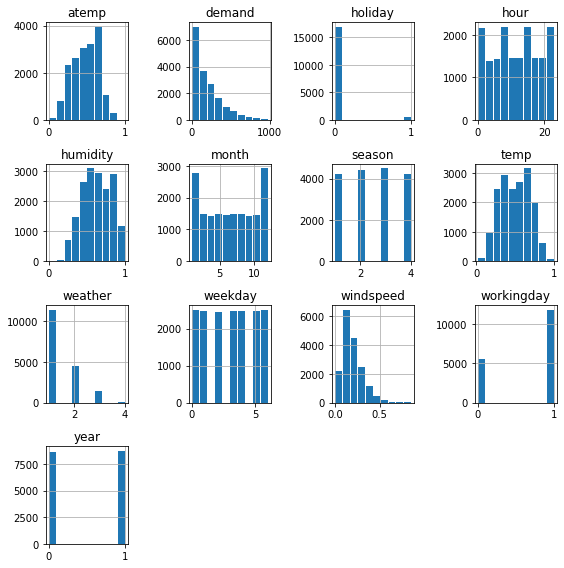

In [7]:
# Create pandas histogram
bikes_prep.hist(rwidth=0.9, figsize=(8,8))
plt.tight_layout()

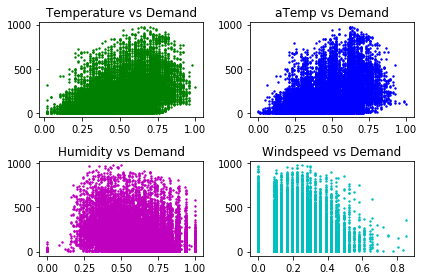

In [9]:
# --------------------------------------------
# Step 3 - Data Visualisation
# --------------------------------------------
    
plt.subplot(2,2,1)
plt.title('Temperature vs Demand')
plt.scatter(bikes_prep['temp'], bikes_prep['demand'], s=2, c='g')

plt.subplot(2,2,2)
plt.title('aTemp vs Demand')
plt.scatter(bikes_prep['atemp'], bikes_prep['demand'], s=2, c='b')

plt.subplot(2,2,3)
plt.title('Humidity vs Demand')
plt.scatter(bikes_prep['humidity'], bikes_prep['demand'], s=2, c='m')

plt.subplot(2,2,4)
plt.title('Windspeed vs Demand')
plt.scatter(bikes_prep['windspeed'], bikes_prep['demand'], s=2, c='c')

plt.tight_layout()

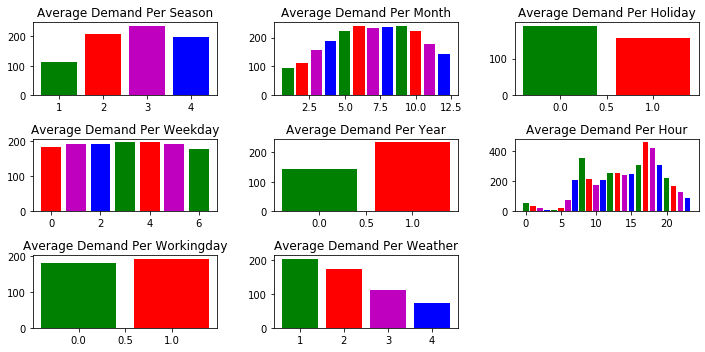

In [11]:
# Visualise the categorical features

plt.figure(figsize=(10,5))
colors = ['g','r','m','b']
plt.subplot(3,3,1)
plt.title('Average Demand Per Season')
cat_list = bikes_prep['season'].unique()
cat_average = bikes_prep.groupby('season')['demand'].mean()
plt.bar(cat_list, cat_average, color=colors)

colors = ['g','r','m','b']
plt.subplot(3,3,2)
plt.title('Average Demand Per Month')
cat_list = bikes_prep['month'].unique()
cat_average = bikes_prep.groupby('month')['demand'].mean()
plt.bar(cat_list, cat_average, color=colors)

colors = ['g','r','m','b']
plt.subplot(3,3,3)
plt.title('Average Demand Per Holiday')
cat_list = bikes_prep['holiday'].unique()
cat_average = bikes_prep.groupby('holiday')['demand'].mean()
plt.bar(cat_list, cat_average, color=colors)

colors = ['g','r','m','b']
plt.subplot(3,3,4)
plt.title('Average Demand Per Weekday')
cat_list = bikes_prep['weekday'].unique()
cat_average = bikes_prep.groupby('weekday')['demand'].mean()
plt.bar(cat_list, cat_average, color=colors)

colors = ['g','r','m','b']
plt.subplot(3,3,5)
plt.title('Average Demand Per Year')
cat_list = bikes_prep['year'].unique()
cat_average = bikes_prep.groupby('year')['demand'].mean()
plt.bar(cat_list, cat_average, color=colors)

colors = ['g','r','m','b']
plt.subplot(3,3,6)
plt.title('Average Demand Per Hour')
cat_list = bikes_prep['hour'].unique()
cat_average = bikes_prep.groupby('hour')['demand'].mean()
plt.bar(cat_list, cat_average, color=colors)

colors = ['g','r','m','b']
plt.subplot(3,3,7)
plt.title('Average Demand Per Workingday')
cat_list = bikes_prep['workingday'].unique()
cat_average = bikes_prep.groupby('workingday')['demand'].mean()
plt.bar(cat_list, cat_average, color=colors)

colors = ['g','r','m','b']
plt.subplot(3,3,8)
plt.title('Average Demand Per Weather')
cat_list = bikes_prep['weather'].unique()
cat_average = bikes_prep.groupby('weather')['demand'].mean()
plt.bar(cat_list, cat_average, color=colors)

plt.tight_layout()

<BarContainer object of 24 artists>

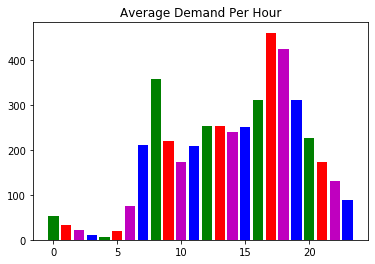

In [13]:
plt.title('Average Demand Per Hour')
cat_list = bikes_prep['hour'].unique()
cat_average = bikes_prep.groupby('hour')['demand'].mean()
plt.bar(cat_list, cat_average, color=colors)

In [15]:
# Check for outliers

bikes_prep['demand'].describe()

bikes_prep['demand'].quantile([0.05,0.1,0.15,0.9,0.95,0.99])

# 5% of the time demand is lower or eq to 5
# 1% of the time demand is higher than 782
# This can be considered as outliers.

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

In [16]:
# --------------------------------------------------------
# Step 4 - Check multiple linear regression assumptions
# --------------------------------------------------------

# Linearity using correlation coefficient matrix using corr
correlation = bikes_prep[['temp','atemp','humidity',\
                          'windspeed','demand']].corr()
correlation

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


In [17]:
bikes_prep = bikes_prep.drop(['weekday','year','workingday','atemp','windspeed'],axis=1)

In [18]:
bikes_prep.head(3)

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32


(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474708, 0.4704955 , 0.49622798, 0.49404052, 0.4679593 ,
        0.47732034, 0.52675766, 0.59145737, 0.6520156 , 0.7151954 ,
        0.80591017, 0.92530966, 1.        , 0.92530966, 0.80591017,
        0.7151954 , 0.6520156 , 0.59145737, 0.52675766, 0.47732034,
        0.4679593 , 0.49404052, 0.49622798, 0.4704955 , 0.45474708],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x29f7f58f988>)

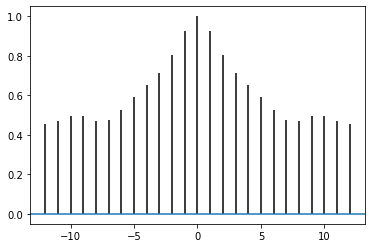

In [19]:
# Autocorrelation of demand using acor

df1 = pd.to_numeric(bikes_prep['demand'], downcast='float')
plt.acorr(df1, maxlags=12)

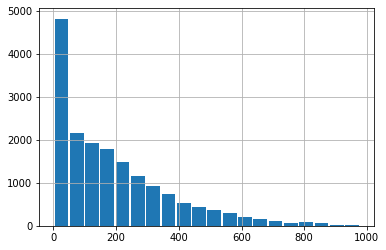

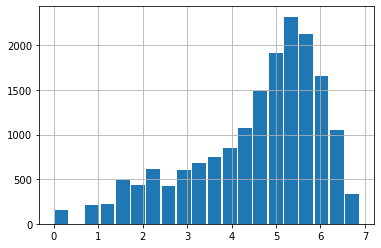

In [20]:
# ------------------------------------------
# Step 6. Create / Modify new features
# ------------------------------------------

df1 = bikes_prep['demand']
df2 = np.log(df1)

plt.figure()
df1.hist(rwidth=0.9, bins=20)

plt.figure()
df2.hist(rwidth=0.9, bins=20)

In [21]:
bikes_prep['demand'] = np.log(bikes_prep['demand'])

In [22]:
# Shifting the demand by 3 lags

t_1 = bikes_prep['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = bikes_prep['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3 = bikes_prep['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']

# Concatenate the time lag columns
bikes_prep_lag = pd.concat([bikes_prep, t_1, t_2, t_3], axis=1)
bikes_prep_lag

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
0,1,1,0,0,1,0.24,0.81,2.772589,NaN,NaN,NaN
1,1,1,1,0,1,0.22,0.80,3.688879,2.772589,NaN,NaN
2,1,1,2,0,1,0.22,0.80,3.465736,3.688879,2.772589,NaN
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,4.779123,4.804021,5.099866,5.365976
17375,1,12,20,0,2,0.26,0.60,4.488636,4.779123,4.804021,5.099866
17376,1,12,21,0,1,0.26,0.60,4.499810,4.488636,4.779123,4.804021
17377,1,12,22,0,1,0.26,0.56,4.110874,4.499810,4.488636,4.779123


In [23]:
# Deleting NULL rows
bikes_prep_lag = bikes_prep_lag.dropna()
bikes_prep_lag.shape

(17376, 11)

In [24]:
# ------------------------------------------------
# Step 7. Create Dummy Variables and drop first to avaoid dummy variable trap
# ------------------------------------------------
# - season
# - holiday
# - weather
# - month
# - hour

dummy_df = pd.get_dummies(bikes_prep_lag, drop_first=True)
dummy_df.head(3)

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736


In [25]:
# Changing the type to 'category'

bikes_prep_lag['season'] = bikes_prep_lag['season'].astype('category') 
bikes_prep_lag['holiday'] = bikes_prep_lag['holiday'].astype('category') 
bikes_prep_lag['weather'] = bikes_prep_lag['weather'].astype('category') 
bikes_prep_lag['month'] = bikes_prep_lag['month'].astype('category') 
bikes_prep_lag['hour'] = bikes_prep_lag['hour'].astype('category') 

bikes_prep_lag = pd.get_dummies(bikes_prep_lag, drop_first=True)
bikes_prep_lag

C:\Users\sahil\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sahil\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\sahil\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.60,4.779123,4.804021,5.099866,5.365976,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
17375,0.26,0.60,4.488636,4.779123,4.804021,5.099866,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
17376,0.26,0.60,4.499810,4.488636,4.779123,4.804021,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
17377,0.26,0.56,4.110874,4.499810,4.488636,4.779123,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [26]:
# --------------------------------------------
# Step 8 - Create Train & Test split
# --------------------------------------------

Y = bikes_prep_lag[['demand']]
X = bikes_prep_lag.drop(['demand'], axis=1)

In [27]:
tr_size = 0.7 * len(X)
tr_size = int(tr_size)
tr_size

12163

In [28]:
X_train = X.values[0 : tr_size]
X_test = X.values[tr_size : len(X)]

Y_train = Y.values[0 : tr_size]
Y_test = Y.values[tr_size : len(Y)]

In [29]:
# ------------------------------------------------
# Step 9 - Fit and Score the model
# ------------------------------------------------

# Linear Regression
from sklearn.linear_model import LinearRegression

std_reg = LinearRegression()
std_reg.fit(X_train, Y_train)

r2_train = std_reg.score(X_train, Y_train)
r2_test = std_reg.score(X_test, Y_test)

In [35]:
print(r2_train)
print(r2_test)

0.9195240591465778
0.9287151360253384


In [39]:
# Create Y Predictions

Y_predict = std_reg.predict(X_test)

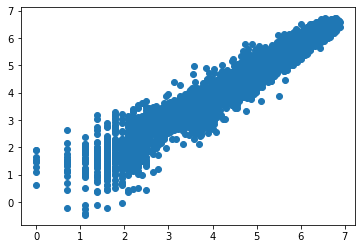

In [38]:
plt.scatter(Y_test,Y_predict)

In [31]:
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(Y_test, Y_predict))

In [32]:
rmse

0.38098800498170443

In [33]:
# Calculating RMSLE and comparing results

Y_test_e = []
Y_predict_e = []

for i in range(0, len(Y_test)):
    Y_test_e.append(math.exp(Y_test[i]))
    Y_predict_e.append(math.exp(Y_predict[i]))
    
log_sq_sum = 0.0
for i in range(0, len(Y_test_e)):
    log_a = math.log(Y_test_e[i] + 1)
    log_p = math.log(Y_predict_e[i] + 1)
    log_diff = (log_p - log_a)**2
    log_sq_sum = log_sq_sum + log_diff

rmsle = math.sqrt(log_sq_sum/len(Y_test))

print(rmsle)

0.3560941706980208
